In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from micrograd.value import Value
from neural_networks_zero_to_hero.micrograd.graph import Graph
from micrograd.neuron import MLP

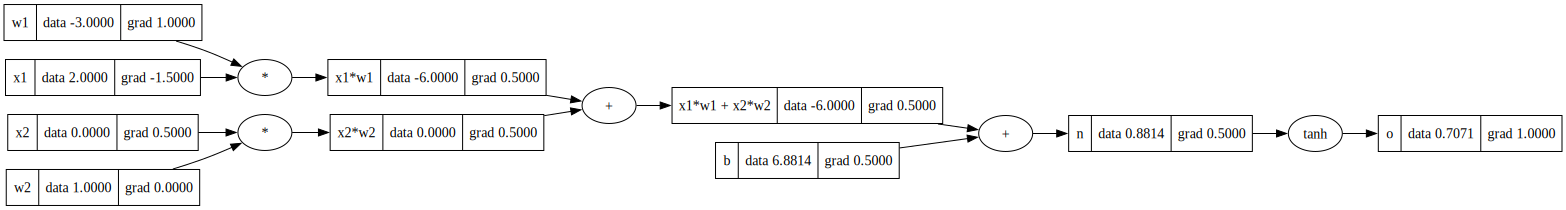

In [139]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"

o.backward()
Graph(o).print()


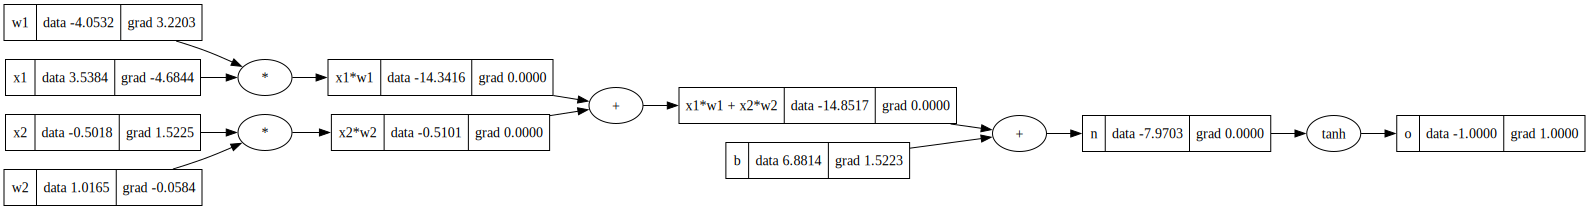

In [143]:
x1.data -= 0.1 * x1.grad
x2.data -= 0.1 * x2.grad
w1.data -= 0.1 * w1.grad
w2.data -= 0.1 * w2.grad
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"
o.backward()
Graph(o).print()

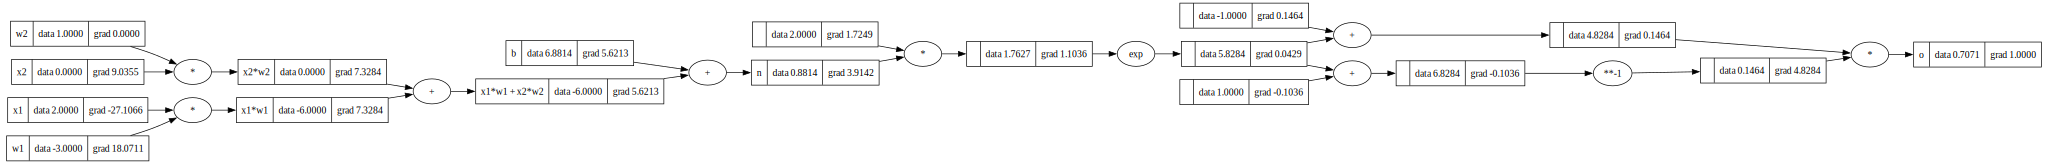

In [52]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# Now we define o
e = (2 * n).exp()
o = (e - 1) / (e + 1); o.label = 'o'
o.backward()
Graph(o).print()

In [178]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0]
] # Four examples
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [179]:
mlp = MLP(3, [3, 4, 1])

In [235]:
predictions = [mlp(x) for x in xs]

In [236]:
predictions

[Value(data=0.9803344237433629),
 Value(data=-0.9864533645679368),
 Value(data=-0.986714033888878),
 Value(data=0.980471220256714)]

In [237]:
[(target - prediction)**2 for prediction, target in zip(predictions, ys)]
loss = sum([(target - prediction)**2 for prediction, target in zip(predictions, ys)])
loss


Value(data=0.001128136354802502)

In [238]:
loss.backward()

In [239]:
for parameter in mlp.parameters():
  parameter.data += -0.01 * parameter.grad

In [267]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0]
] # Four examples
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
mlp = MLP(3, [3, 4, 1])
mlp.train(xs, ys)

0 5.721683446396199
1 4.805798456595662
2 3.99636245375726
3 3.572146147324162
4 3.3960210071238577
5 3.2303945487317494
6 3.0826122623643597
7 2.928093135758651
8 2.759771359976786
9 2.5738398561005282
10 2.3689448915206066
11 2.146844261565413
12 1.91318219384156
13 1.6774654361432468
14 1.4514438694633172
15 1.2460431280834343
16 1.0683603358681046
17 0.92046577942255
18 0.8003292399965029
19 0.7037394320256222
20 0.6259873153735829
21 0.5628289908826214
22 0.5108328333850258
23 0.4673803019032604
24 0.4305298289982918
25 0.398856186574191
26 0.371310751960973
27 0.3471139513085089
28 0.3256773341424094
29 0.3065488140644382
30 0.28937468631270546
31 0.27387332486640636
32 0.2598168542018195
33 0.24701822849966007
34 0.23532198325952203
35 0.2245974999642172
36 0.21473401099532458
37 0.20563682766733304
38 0.19722444237508696
39 0.18942626649487915
40 0.18218083889834802
41 0.1754343888319566
42 0.1691396699510411
43 0.1632550049277934
44 0.1577434957901509
45 0.15257236626755316
46